##Загрузка и предобработка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
my_file = open("Pokemon.csv","r")
data = pd.read_csv(my_file)
data.shape

(800, 13)

In [ ]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
# DataFrame не содержащий целевой признак
X_ALL = data.drop(['Speed','Name','Type 1',	'Type 2','Legendary'], axis=1)

In [ ]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [ ]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Speed'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((640, 8), (160, 8))

##1.MinMax-масштабирование

Особенности метода:

1) Среднее значение может варьироваться.
2) Среднеквадратичное отклонение может варьироваться.
3) Форма исходного распределения может изменяться.
4) Максимальные и минимальные значения в диапазоне [0;1].
5) Выбросы сохраняются.

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.502519,0.425171,0.268735,0.400007,0.305967,0.341413,0.247155,0.464750
std,0.289366,0.199938,0.100530,0.175445,0.138593,0.177839,0.132519,0.332258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.255208,0.250000,0.192913,0.270270,0.200000,0.216033,0.142857,0.200000
50%,0.504861,0.450000,0.251969,0.378378,0.288889,0.298913,0.238095,0.400000
75%,0.747569,0.558333,0.311024,0.513514,0.377778,0.461957,0.333333,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

In [ ]:
# Построение плотности распределения
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

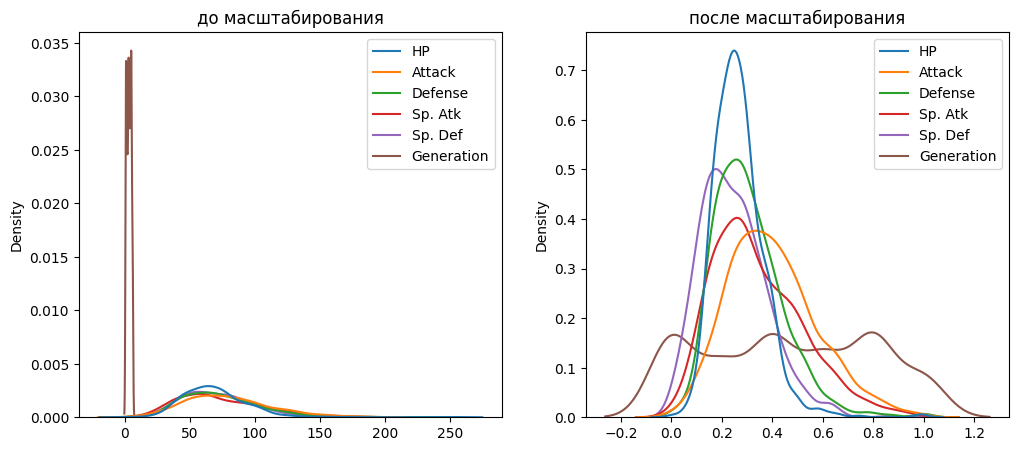

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

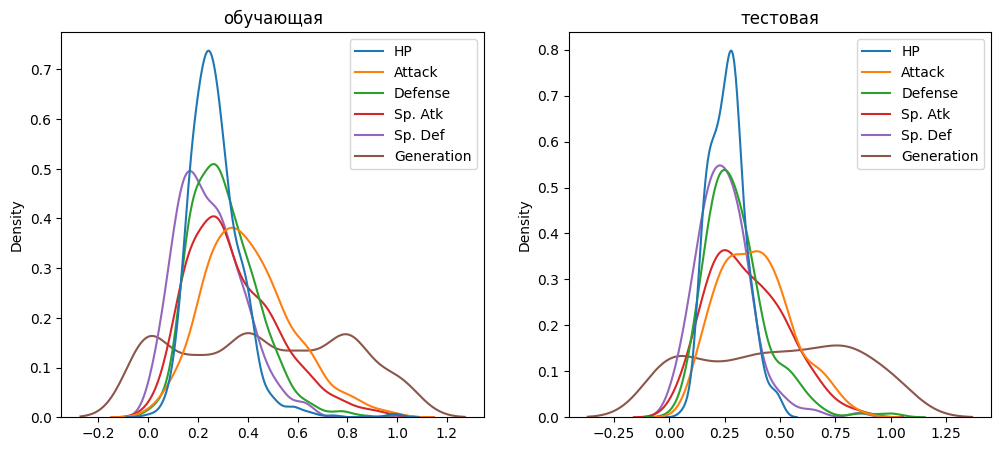

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

##1.Масштабирование по медиане

Особенности метода:

1) Медиана приводится к 0.
2) Среднеквадратичное отклонение может варьироваться.
3) Форма исходного распределения может изменяться.
4) Максимальные и минимальные значения могут варьироваться.
5) Устраняются выбросы.

In [ ]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,-0.004757,-0.080527,0.141958,0.088917,0.096062,0.172818,0.047563,0.107917
std,0.587712,0.648449,0.851156,0.721275,0.779588,0.723145,0.695723,0.553763
min,-1.025388,-1.459459,-2.133333,-1.555556,-1.625000,-1.215470,-1.250000,-0.666667
25%,-0.507052,-0.648649,-0.500000,-0.444444,-0.500000,-0.337017,-0.500000,-0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.492948,0.351351,0.500000,0.555556,0.500000,0.662983,0.500000,0.666667
max,1.005642,1.783784,6.333333,2.555556,4.000000,2.850829,4.000000,1.000000


In [ ]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

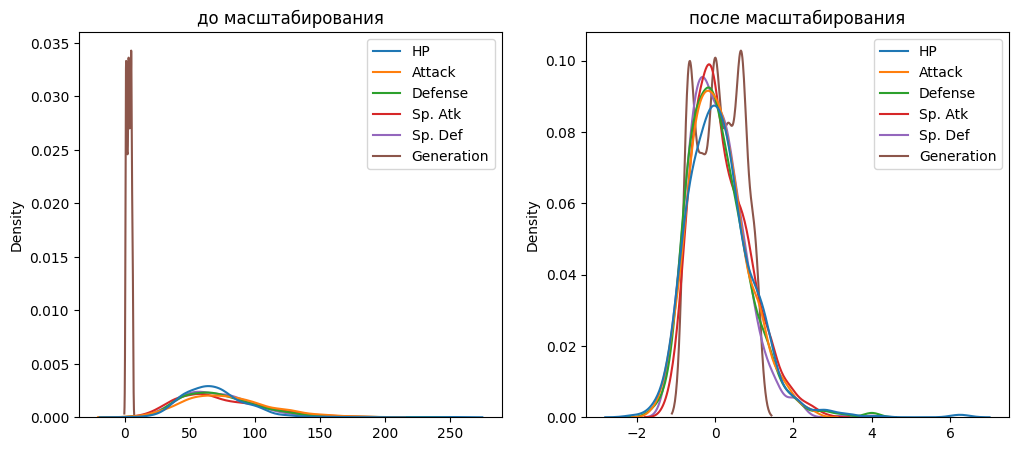

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

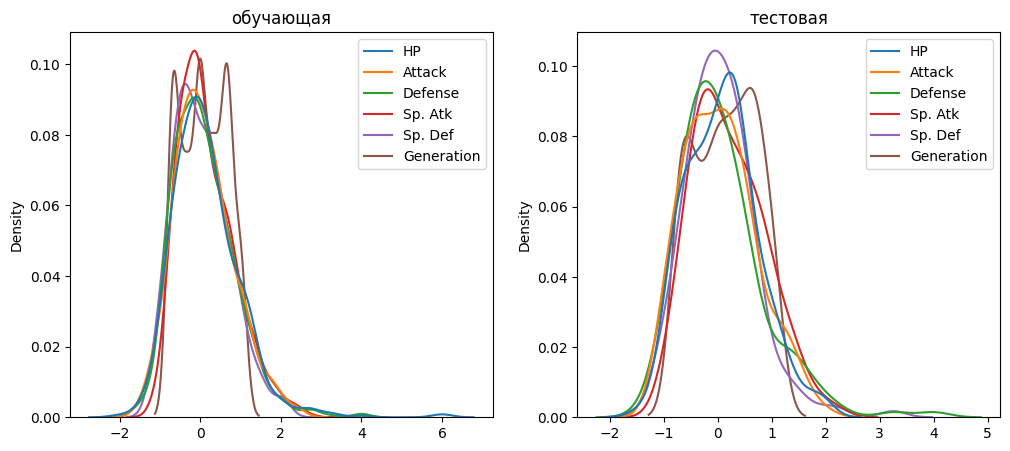

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

##1.Масштабирование по максимальному значению

Особенности метода:

1) Среднее значение НЕ ЦЕНТРИРУЕТСЯ. Предполагается что оно уже отцентрировано исходя их характера данных.
2) Среднеквадратичное отклонение не масштабируется.
3) Форма исходного распределения может изменяться.
4) Максимальные и минимальные значения в диапазоне [-1;1].

In [ ]:
cs51 = MaxAbsScaler()
data_cs51_scaled_temp = cs51.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs51_scaled = arr_to_df(data_cs51_scaled_temp)
data_cs51_scaled.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.503209,0.557824,0.271603,0.415796,0.321054,0.375361,0.312620,0.553958
std,0.288965,0.153799,0.100136,0.170828,0.135580,0.168672,0.120995,0.276882
min,0.001387,0.230769,0.003922,0.026316,0.021739,0.051546,0.086957,0.166667
25%,0.256241,0.423077,0.196078,0.289474,0.217391,0.256443,0.217391,0.333333
50%,0.505548,0.576923,0.254902,0.394737,0.304348,0.335052,0.304348,0.500000
75%,0.747920,0.660256,0.313725,0.526316,0.391304,0.489691,0.391304,0.833333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
cs52_mas = MaxAbsScaler()
cs52_mean = StandardScaler(with_mean=True, with_std=False)

cs52_mas.fit(X_train)
cs52_mean.fit(X_train)

data_cs52_scaled_train_temp = cs52_mas.transform(cs52_mean.transform(X_train))
data_cs52_scaled_test_temp = cs52_mas.transform(cs52_mean.transform(X_test))
# формируем DataFrame на основе массива
data_cs52_scaled_train = arr_to_df(data_cs52_scaled_train_temp)
data_cs52_scaled_test = arr_to_df(data_cs52_scaled_test_temp)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


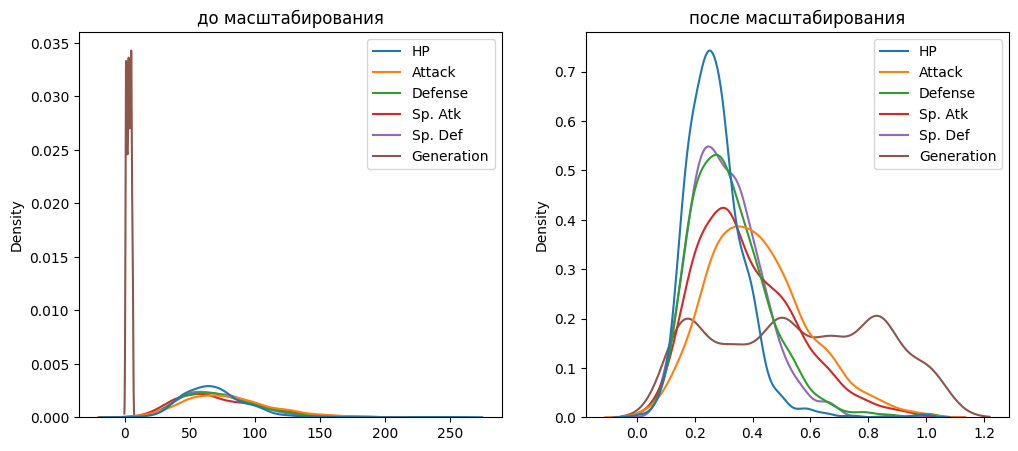

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data, data_cs51_scaled, 'до масштабирования', 'после масштабирования')

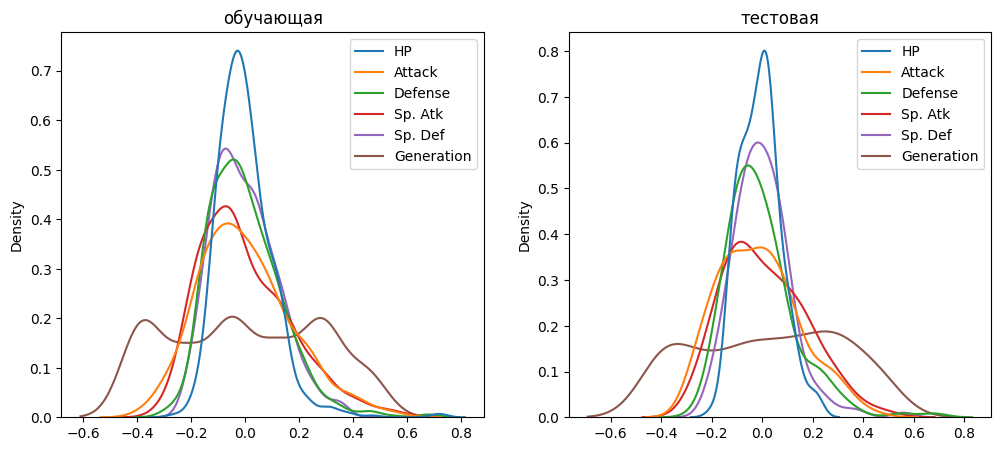

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data_cs52_scaled_train, data_cs52_scaled_test, 'обучающая', 'тестовая')

##1.Масштабирование "Mean Normalisation"

Особенности метода:

1) Среднее значение приводится к 0.
2) Среднеквадратичное отклонение может варьироваться.
3) Форма исходного распределения может изменяться.
4) Максимальные и минимальные значения в диапазоне [-1;1].
5) Выбросы сохраняются.

In [ ]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [ ]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.005073,-0.000881,-0.001762,-0.002831,-0.000832,0.002300,0.000138,0.005375
std,0.289366,0.199938,0.100530,0.175445,0.138593,0.177839,0.132519,0.332258
min,-0.497446,-0.426052,-0.270497,-0.402838,-0.306799,-0.339113,-0.247016,-0.459375
25%,-0.242237,-0.176052,-0.077584,-0.132568,-0.106799,-0.123081,-0.104159,-0.259375
50%,0.007415,0.023948,-0.018529,-0.024459,-0.017910,-0.040200,-0.008921,-0.059375
75%,0.250124,0.132281,0.040527,0.110676,0.070979,0.122843,0.086317,0.340625
max,0.502554,0.573948,0.729503,0.597162,0.693201,0.660887,0.752984,0.540625


In [ ]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)

In [ ]:
data_cs22_scaled_train.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,1.387779e-17,-3.747003e-17,1.040834e-17,-3.226586e-17,2.428613e-17,3.053113e-17,2.567391e-17,4.163336e-18
std,2.863314e-01,2.010654e-01,1.049264e-01,1.785076e-01,1.376311e-01,1.792396e-01,1.344091e-01,3.305607e-01
min,-4.974457e-01,-4.260521e-01,-2.704970e-01,-4.028378e-01,-3.067986e-01,-3.391135e-01,-2.470164e-01,-4.593750e-01
25%,-2.474457e-01,-1.760521e-01,-7.758366e-02,-1.325676e-01,-1.067986e-01,-1.339504e-01,-1.041592e-01,-2.593750e-01
50%,1.859809e-03,2.394792e-02,-1.852854e-02,-2.445946e-02,-1.790972e-02,-4.020041e-02,-8.921131e-03,-5.937500e-02
75%,2.417904e-01,1.322812e-01,4.544783e-02,1.106757e-01,7.097917e-02,1.228431e-01,8.631696e-02,3.406250e-01
max,5.025543e-01,5.739479e-01,7.295030e-01,5.971622e-01,6.932014e-01,6.608865e-01,7.529836e-01,5.406250e-01


In [ ]:
data_cs22_scaled_test.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.025367,-0.004406,-0.008809,-0.014155,-0.004160,0.011498,0.000692,0.026875
std,0.301270,0.195946,0.080483,0.162656,0.142770,0.172362,0.125073,0.339161
min,-0.494668,-0.401052,-0.195694,-0.294730,-0.262354,-0.311940,-0.247016,-0.459375
25%,-0.211682,-0.180635,-0.077584,-0.140676,-0.100132,-0.121722,-0.080350,-0.259375
50%,0.040749,0.021448,-0.002781,-0.024459,-0.022354,-0.013026,-0.008921,0.040625
75%,0.314013,0.128115,0.040527,0.083649,0.064313,0.122843,0.063698,0.340625
max,0.488665,0.440615,0.217692,0.456622,0.693201,0.530452,0.610126,0.540625


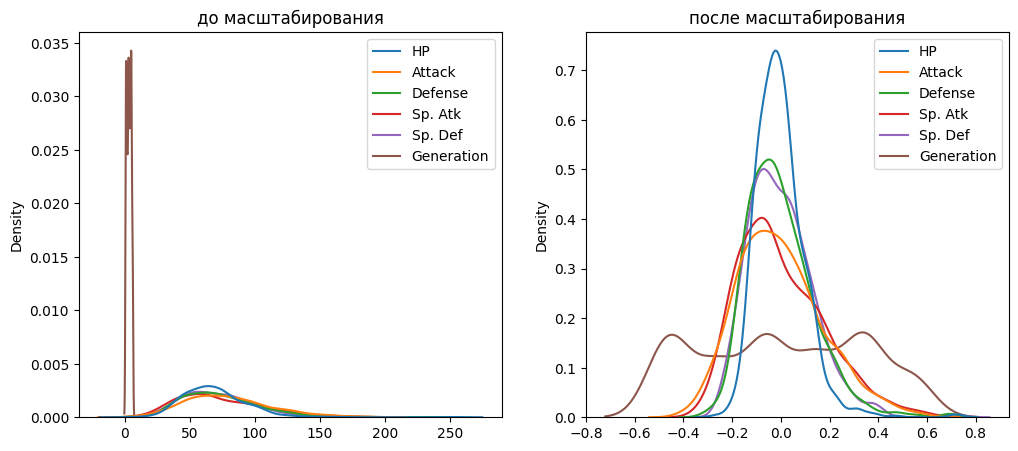

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

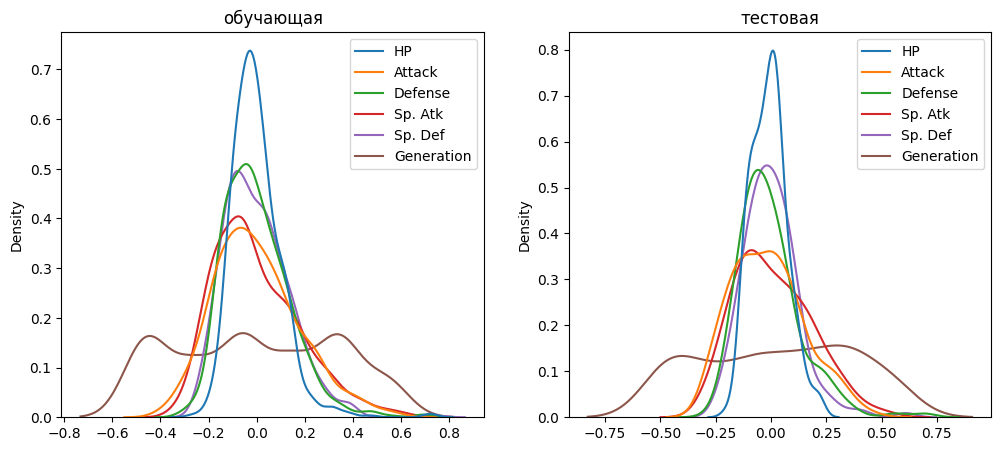

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

##1.Масштабирование данных на основе Z-оценки

Особенности метода:

1) Среднее значение приводится к 0.
2) Среднеквадратичное отклонение приводится к 1.
3) Форма исходного распределения сохраняется.
4) Максимальные и минимальные значения могут варьироваться.
5) Выбросы сохраняются.

In [ ]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
0,-1.737705,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-1.399637
1,-1.732902,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-1.399637
2,-1.728100,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,-1.399637
3,-1.728100,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,-1.399637
4,-1.723297,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-1.399637
...,...,...,...,...,...,...,...,...
795,1.710678,1.375429,-0.754692,0.647369,2.443765,0.831146,2.808099,1.611954
796,1.710678,2.209541,-0.754692,2.497104,1.160233,2.665905,1.369846,1.611954
797,1.715480,1.375429,0.420917,0.955658,-0.444182,2.360112,2.088973,1.611954
798,1.715480,2.042718,0.420917,2.497104,-0.444182,2.971699,2.088973,1.611954


In [ ]:
data_cs11_scaled.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02,8.000000e+02
mean,-1.421085e-16,-1.776357e-16,-2.486900e-16,5.329071e-17,-4.440892e-17,1.953993e-16,-1.421085e-16,-7.105427e-17
std,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00,1.000626e+00
min,-1.737705e+00,-2.127839e+00,-2.674852e+00,-2.281379e+00,-2.209039e+00,-1.920993e+00,-1.866223e+00,-1.399637e+00
25%,-8.551977e-01,-8.766721e-01,-7.546915e-01,-7.399327e-01,-7.650653e-01,-7.054650e-01,-7.875334e-01,-7.973188e-01
50%,8.098657e-03,1.242618e-01,-1.668874e-01,-1.233542e-01,-1.232993e-01,-2.391303e-01,-6.840691e-02,-1.950005e-01
75%,8.473812e-01,6.664343e-01,4.209167e-01,6.473688e-01,5.184667e-01,6.782494e-01,6.507196e-01,1.009636e+00
max,1.720283e+00,2.876830e+00,7.278632e+00,3.421972e+00,5.010829e+00,3.705602e+00,5.684605e+00,1.611954e+00


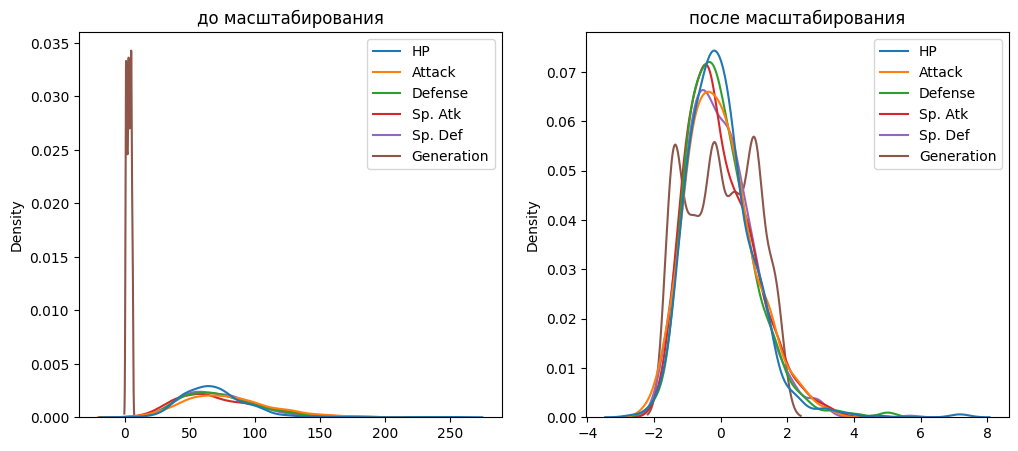

In [ ]:
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

In [ ]:
# Обучаем StandardScaler на обучающей выборке 
# и масштабируем обучающую и тестовую выборки
cs12 = StandardScaler()
cs12.fit(X_train)
data_cs12_scaled_train_temp = cs12.transform(X_train)
data_cs12_scaled_test_temp = cs12.transform(X_test)
# формируем DataFrame на основе массива
data_cs12_scaled_train = arr_to_df(data_cs12_scaled_train_temp)
data_cs12_scaled_test = arr_to_df(data_cs12_scaled_test_temp)

In [ ]:
data_cs12_scaled_train.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02
mean,6.661338e-17,-1.831868e-16,1.013079e-16,-1.595946e-16,1.776357e-16,1.720846e-16,2.053913e-16,-1.665335e-17
std,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00,1.000782e+00
min,-1.738667e+00,-2.120630e+00,-2.579985e+00,-2.258464e+00,-2.230880e+00,-1.893436e+00,-1.839232e+00,-1.390771e+00
25%,-8.648696e-01,-8.762811e-01,-7.399885e-01,-7.432247e-01,-7.765841e-01,-7.479106e-01,-7.755478e-01,-7.852655e-01
50%,6.500384e-03,1.191983e-01,-1.767242e-01,-1.371291e-01,-1.302302e-01,-2.244585e-01,-6.642487e-02,-1.797596e-01
75%,8.451030e-01,6.584163e-01,4.334789e-01,6.204903e-01,5.161237e-01,6.858929e-01,6.426981e-01,1.031252e+00
max,1.756522e+00,2.856767e+00,6.957958e+00,3.347920e+00,5.040601e+00,3.690053e+00,5.606559e+00,1.636758e+00


In [ ]:
data_cs12_scaled_test.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,0.088662,-0.021932,-0.084020,-0.079361,-0.030247,0.064199,0.005152,0.081365
std,1.052995,0.975302,0.767638,0.911914,1.038146,0.962379,0.931267,1.026819
min,-1.728958,-1.996195,-1.866517,-1.652368,-1.907703,-1.741711,-1.839232,-1.390771
25%,-0.739868,-0.899094,-0.739989,-0.788682,-0.728108,-0.679634,-0.598267,-0.785265
50%,0.142424,0.106755,-0.026520,-0.137129,-0.162548,-0.072733,-0.066425,0.122993
75%,1.097533,0.637677,0.386540,0.468966,0.467647,0.685893,0.474281,1.031252
max,1.707978,2.193114,2.076333,2.559996,5.040601,2.961772,4.542874,1.636758


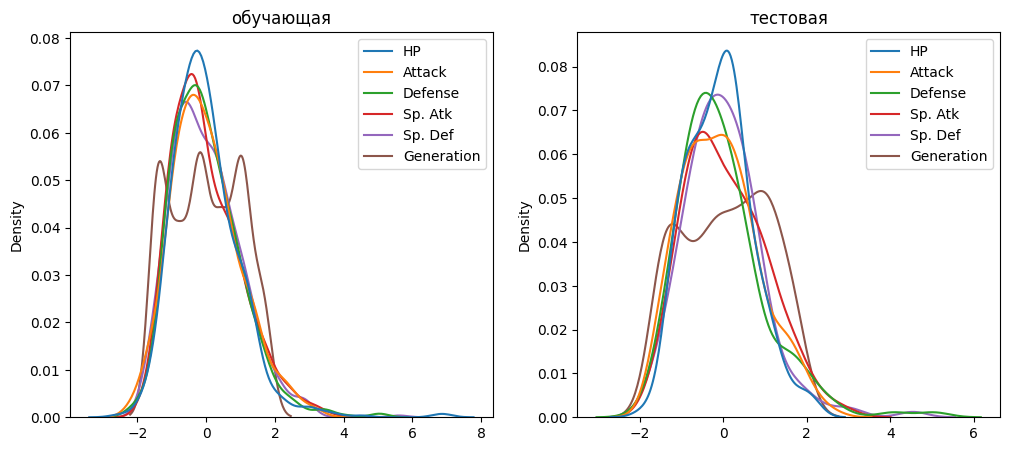

In [ ]:
# распределения для обучающей и тестовой выборки немного отличаются
draw_kde(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Generation'], data_cs12_scaled_train, data_cs12_scaled_test, 'обучающая', 'тестовая')

##Загрузка и предобработка данных

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
x_col_list = ['Speed', 'Defense', 'Attack']

In [ ]:
my_file = open("Pokemon.csv","r")
data = pd.read_csv(my_file)
data.shape

(800, 13)

In [ ]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


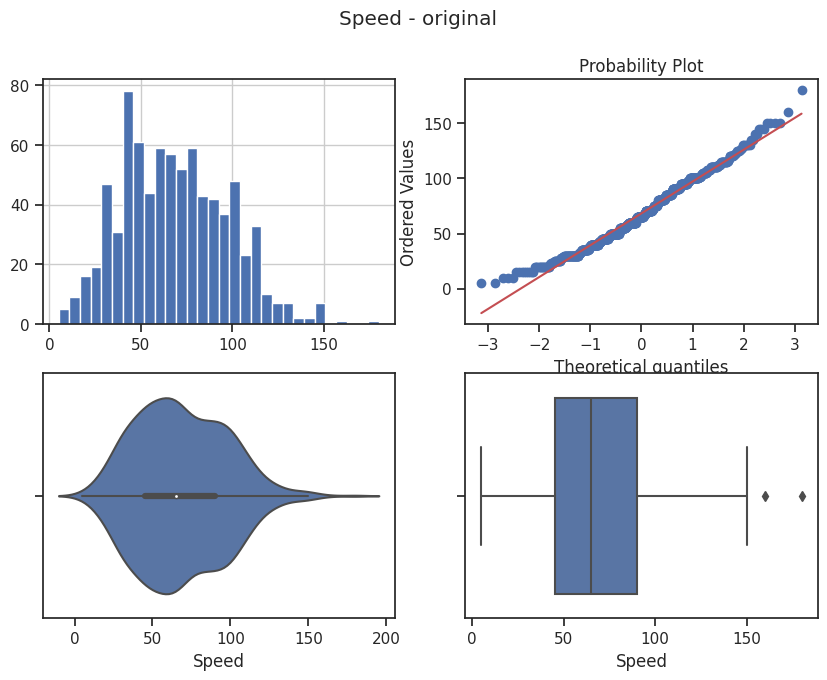

In [ ]:
diagnostic_plots(data, 'Speed', 'Speed - original')

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


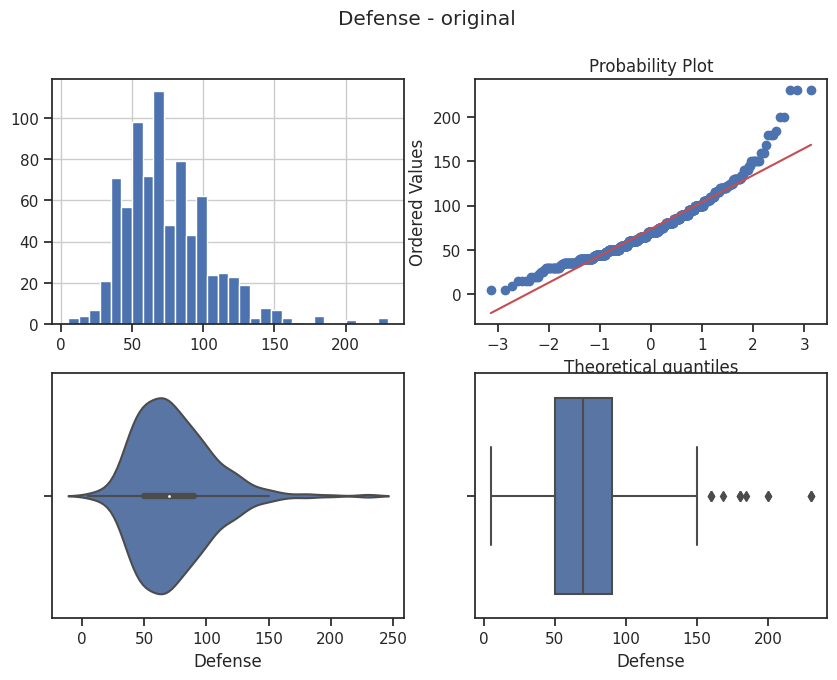

In [ ]:
diagnostic_plots(data, 'Defense', 'Defense - original')

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


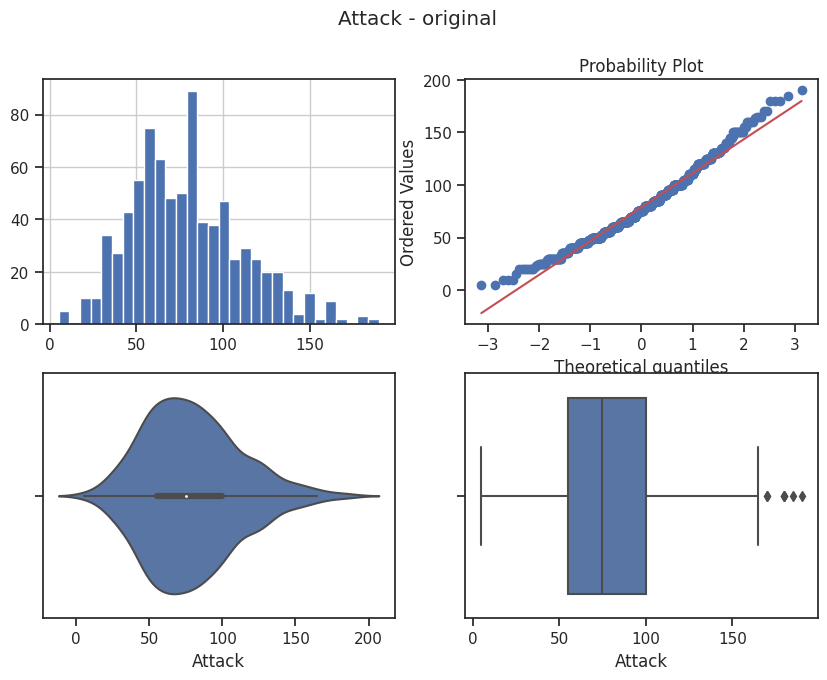

In [ ]:
diagnostic_plots(data, 'Attack', 'Attack - original')

In [ ]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [ ]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary 

##2.Устранение выбросов


Удаление выбросов

In [ ]:
data.shape


(800, 13)

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


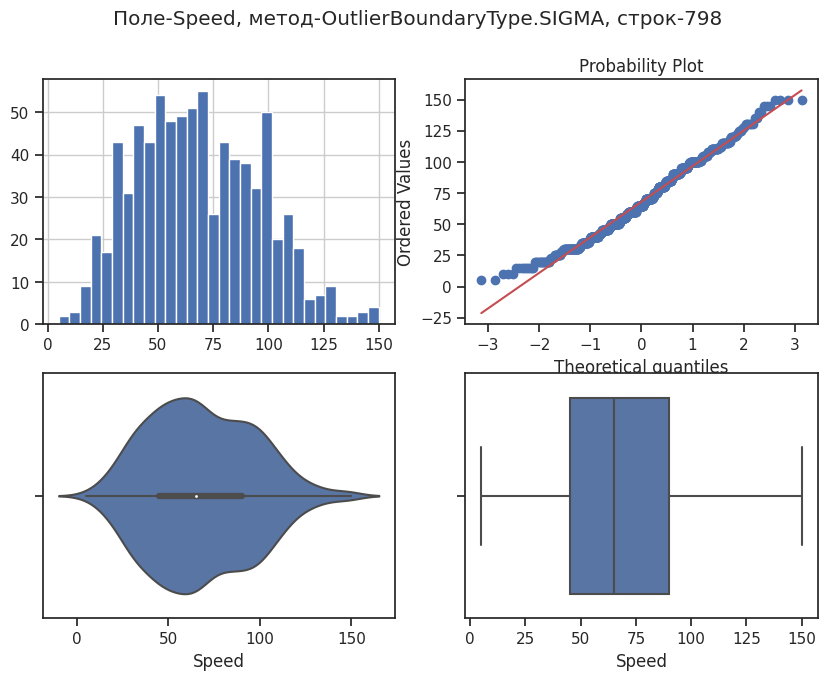

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


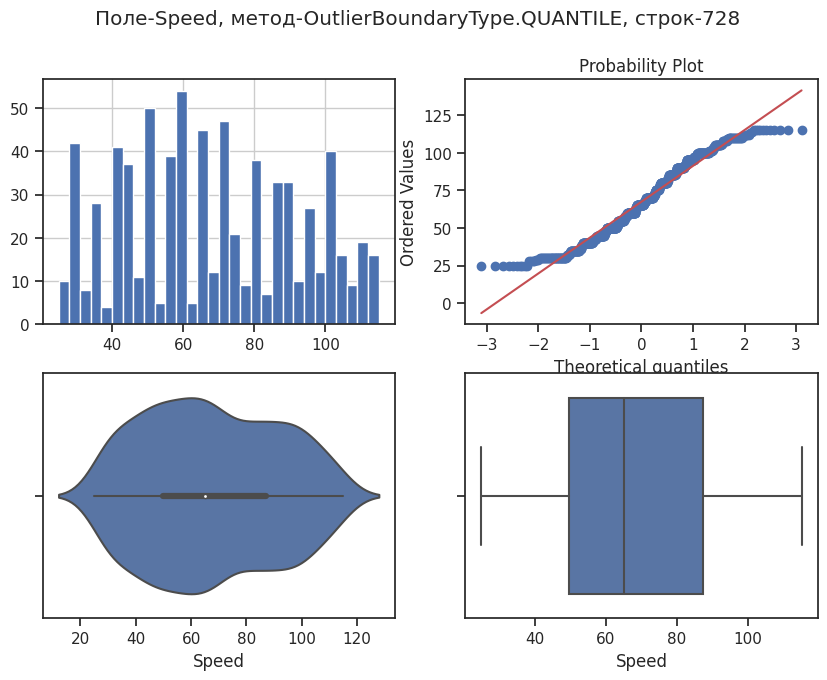

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


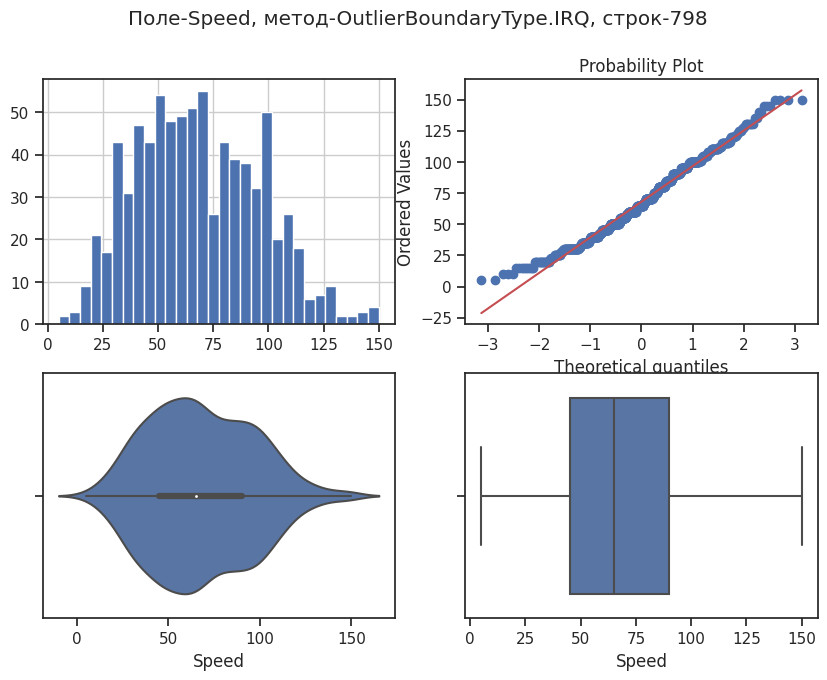

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


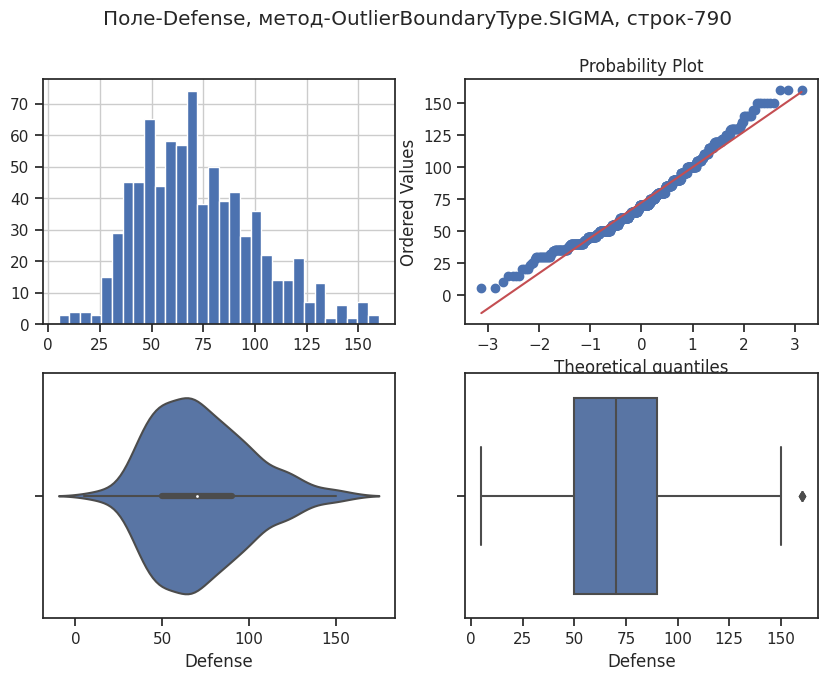

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


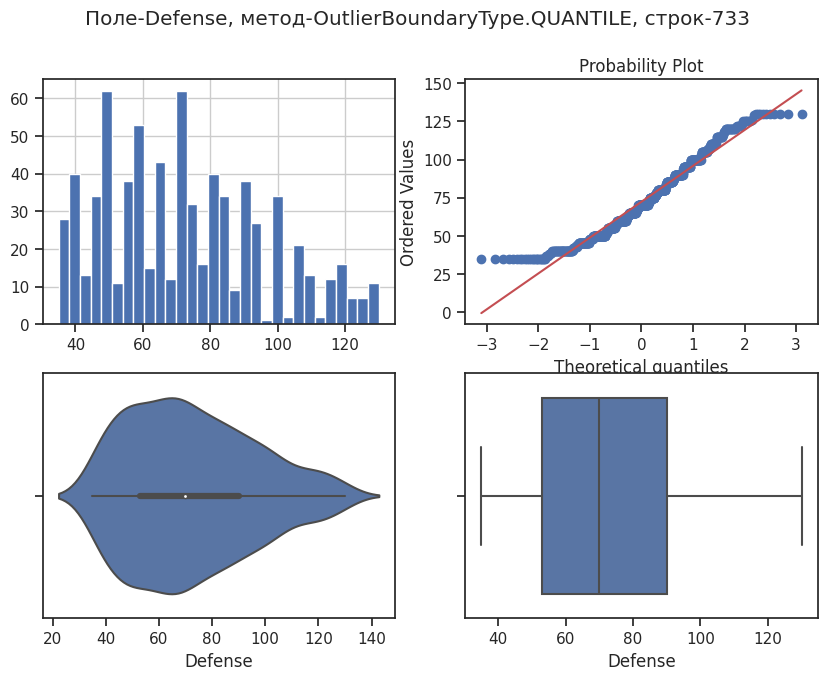

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


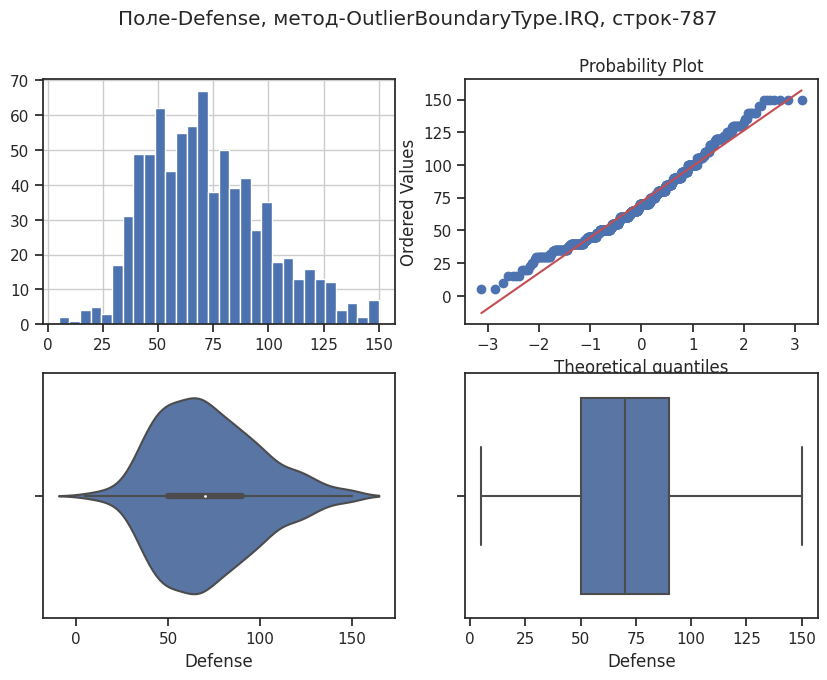

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


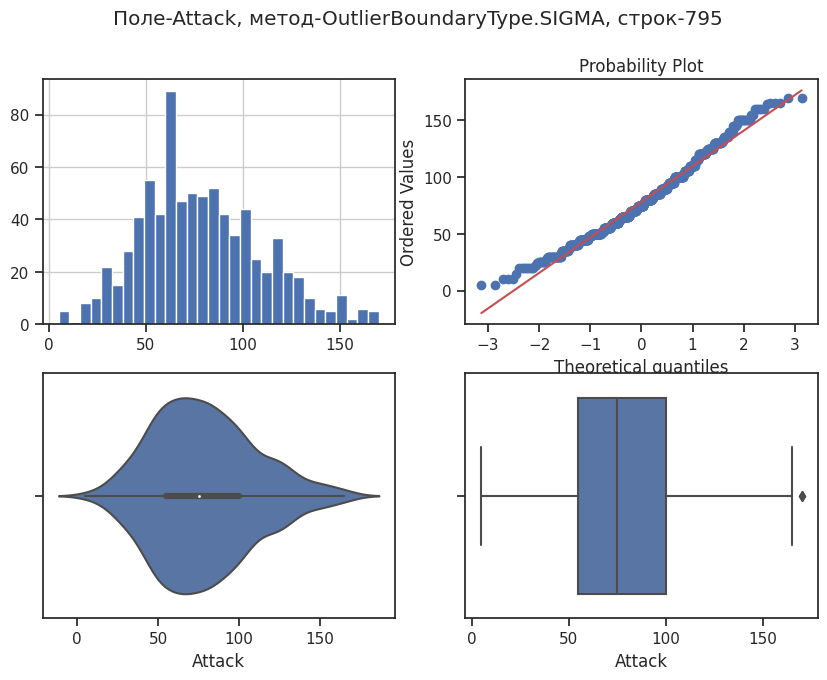

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


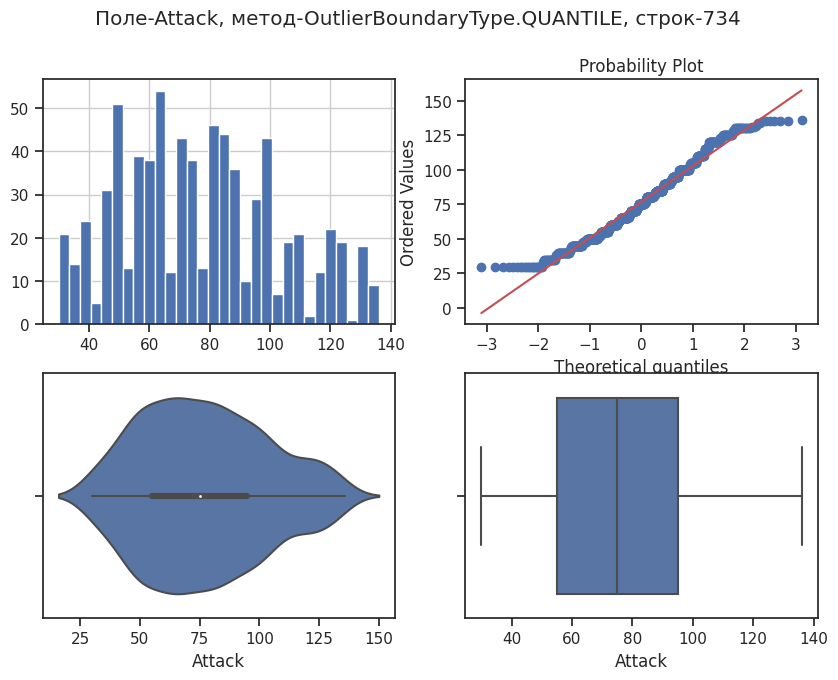

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


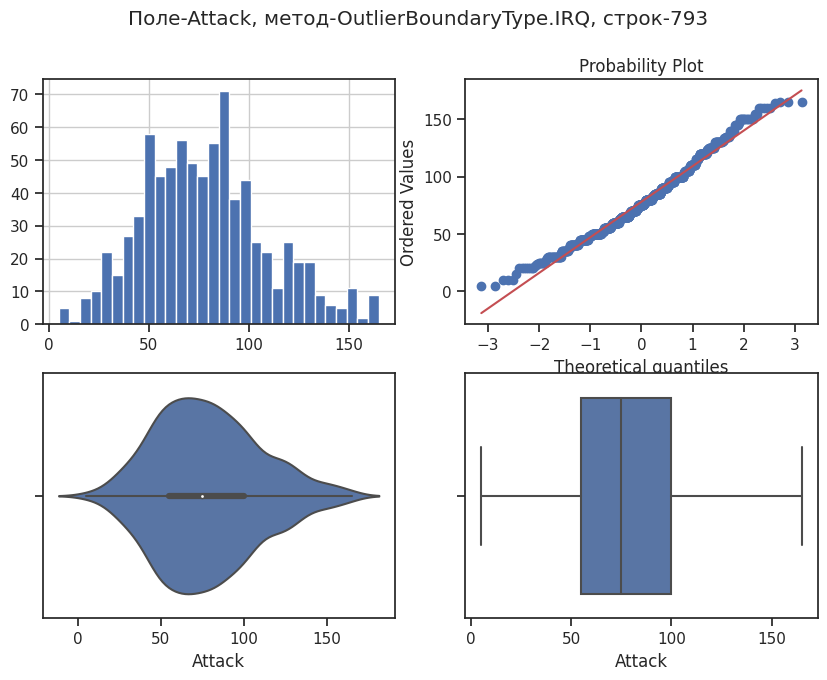

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

Замена выбросов

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


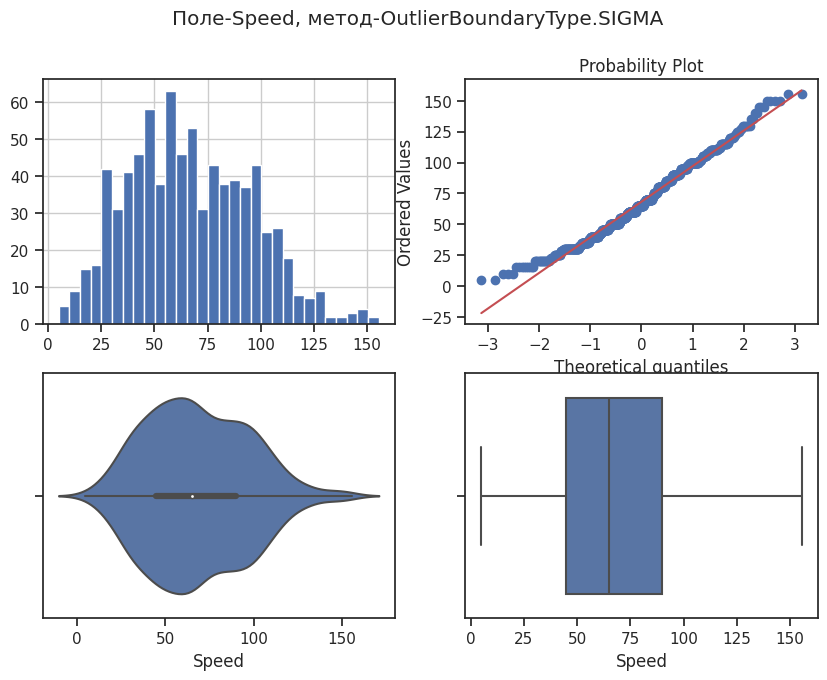

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


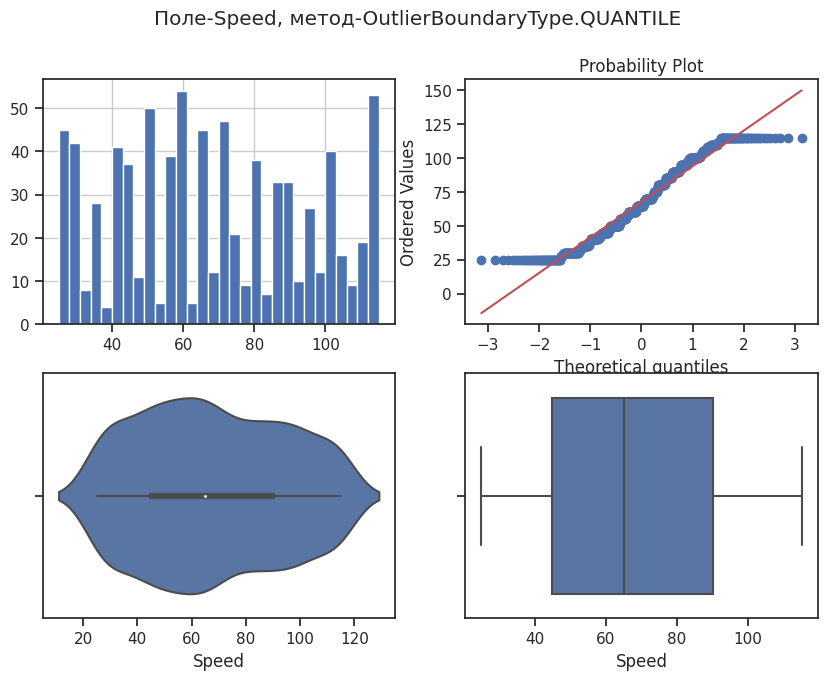

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


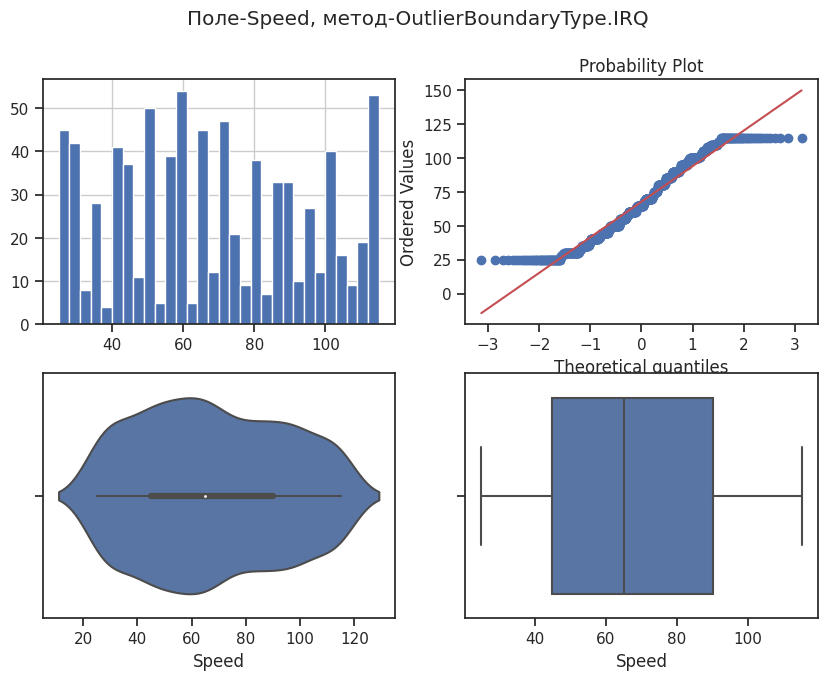

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


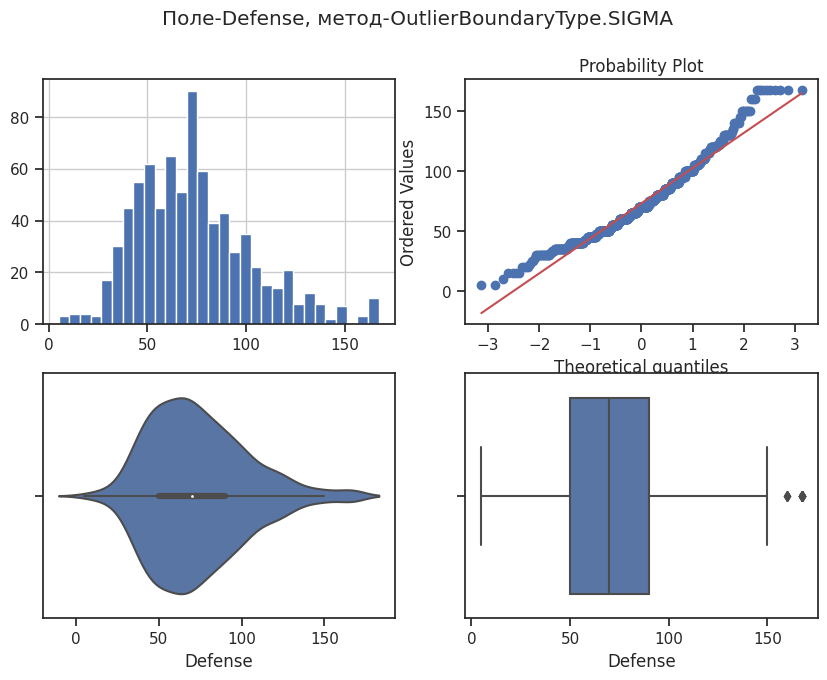

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


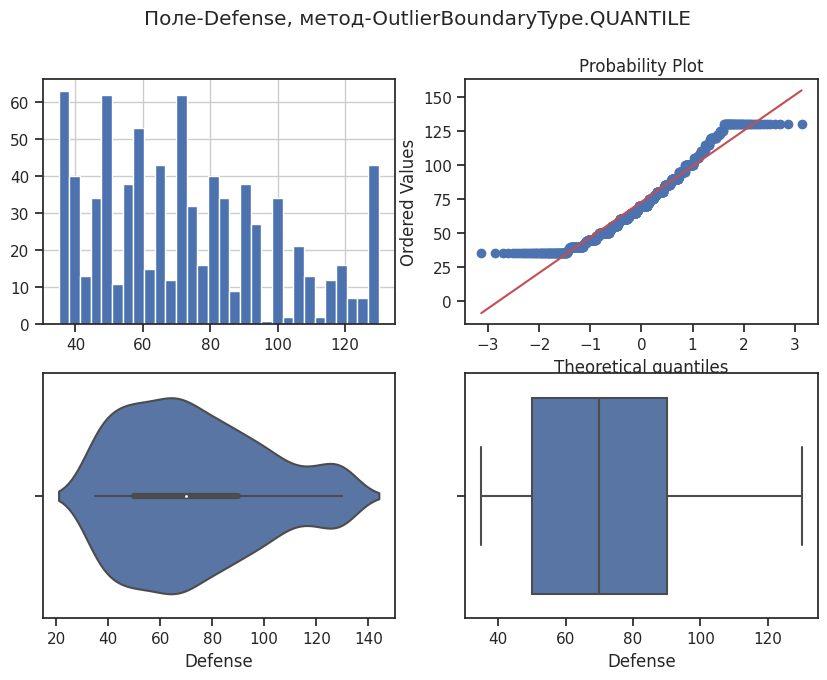

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


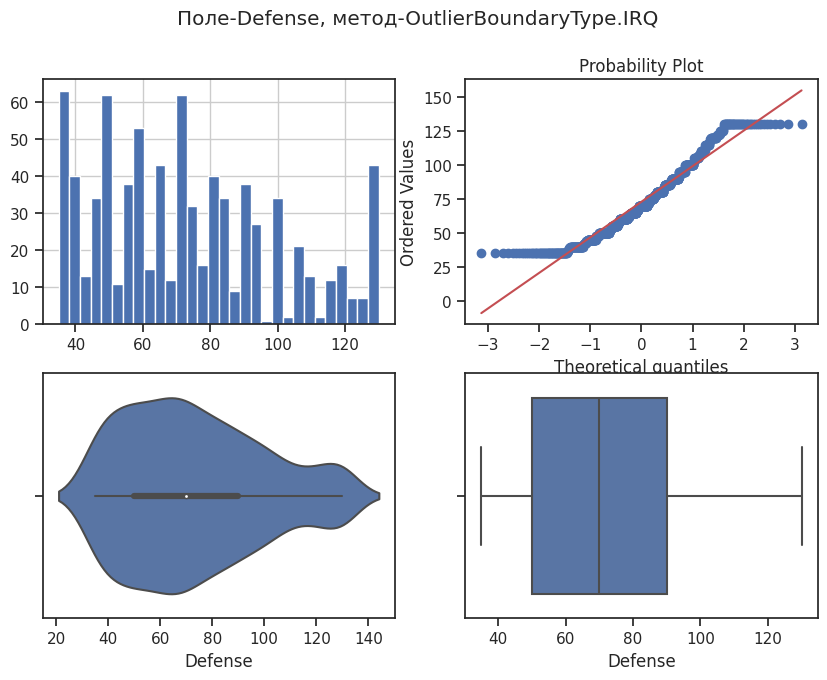

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


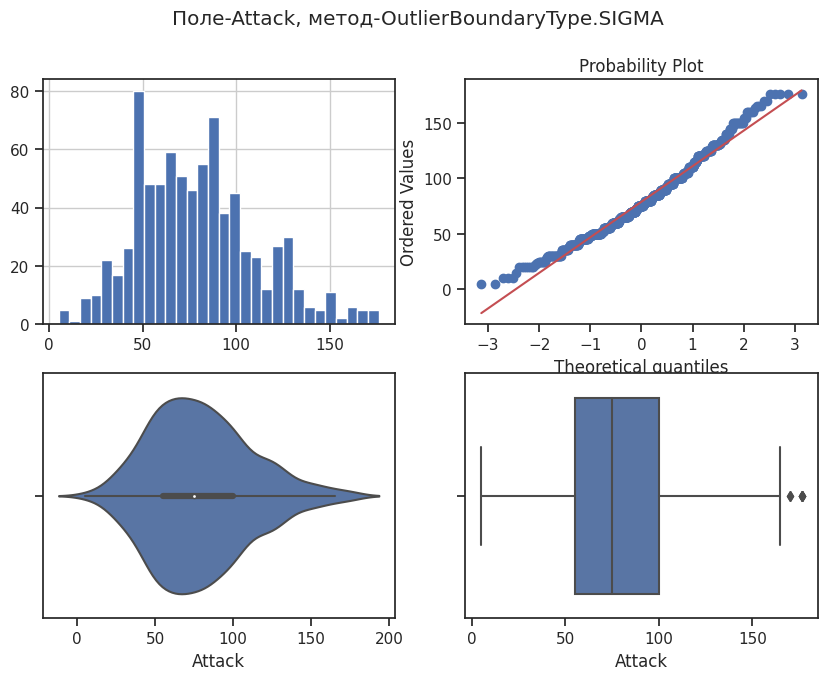

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


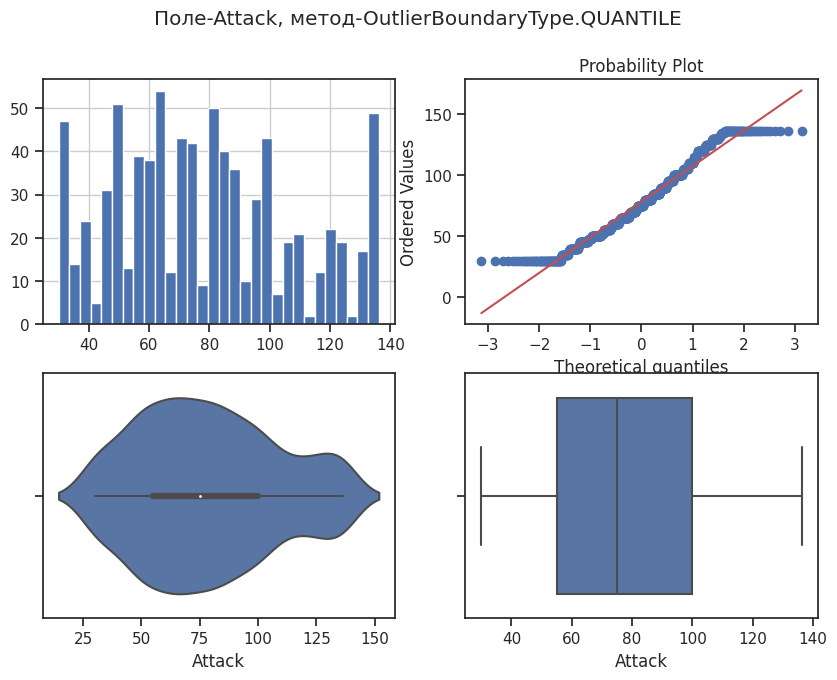

<ipython-input-39-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


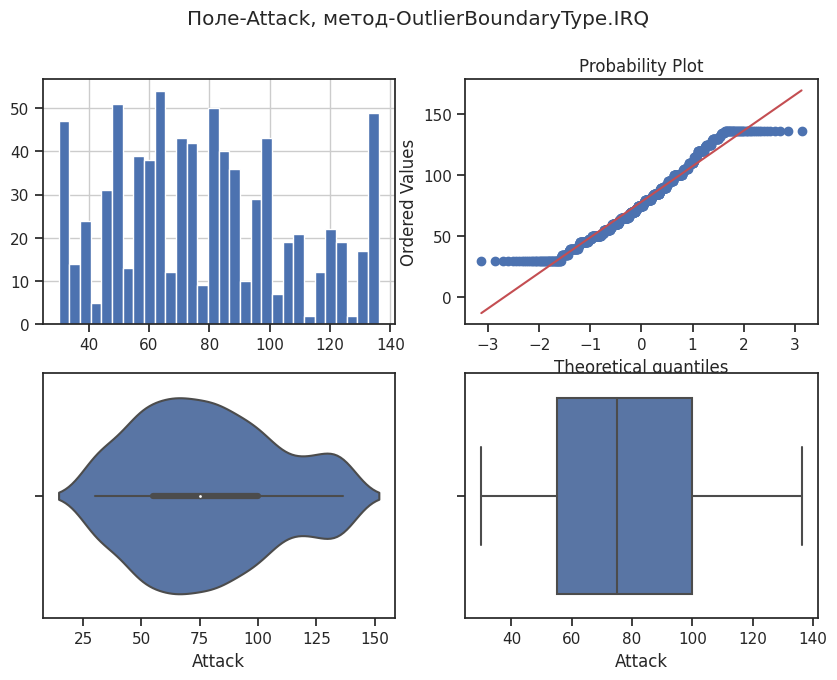

In [ ]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

##3.Обработкa по крайней мере одного нестандартного признака

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import ipaddress
import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
my_file = open("client_hostname.csv","r")
data = pd.read_csv(my_file)
data = data.head(20000)
data.shape

<ipython-input-49-5e7e55cb3977>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(my_file)


(20000, 4)

In [ ]:
data.head()

,client,hostname,alias_list,address_list
0,5.123.144.95,5.123.144.95,[Errno 1] Unknown host,NaN
1,5.122.76.187,5.122.76.187,[Errno 1] Unknown host,NaN
2,5.215.249.99,5.215.249.99,[Errno 1] Unknown host,NaN
3,31.56.102.211,31-56-102-211.shatel.ir,['211.102.56.31.in-addr.arpa'],['31.56.102.211']
4,5.123.166.223,5.123.166.223,[Errno 1] Unknown host,NaN


In [ ]:
def ip_code(ip, level):
    arr = ip.split('.')
    if level > 4:
        level=4
    if level == 1:
        return arr[0]
    else:
        return '_'.join(arr[:level])

In [ ]:
ip_features = []
for i in range(4):
    f = str('ip_' + str(i+1))
    data[f] = data.apply(lambda x: ip_code(x['client'], i+1), axis=1)
    ip_features.append(f)
ip_features    

['ip_1', 'ip_2', 'ip_3', 'ip_4']

In [ ]:
data.head()

,client,hostname,alias_list,address_list,ip_1,ip_2,ip_3,ip_4
0,5.123.144.95,5.123.144.95,[Errno 1] Unknown host,NaN,5,5_123,5_123_144,5_123_144_95
1,5.122.76.187,5.122.76.187,[Errno 1] Unknown host,NaN,5,5_122,5_122_76,5_122_76_187
2,5.215.249.99,5.215.249.99,[Errno 1] Unknown host,NaN,5,5_215,5_215_249,5_215_249_99
3,31.56.102.211,31-56-102-211.shatel.ir,['211.102.56.31.in-addr.arpa'],['31.56.102.211'],31,31_56,31_56_102,31_56_102_211
4,5.123.166.223,5.123.166.223,[Errno 1] Unknown host,NaN,5,5_123,5_123_166,5_123_166_223


In [ ]:
df_ip = pd.get_dummies(data[ip_features])
df_ip.shape

(20000, 34685)

In [ ]:
df_ip.head()

,ip_1_1,ip_1_10,ip_1_101,ip_1_102,ip_1_103,ip_1_104,ip_1_106,ip_1_107,ip_1_108,ip_1_109,...,ip_4_95_82_61_100,ip_4_95_82_61_179,ip_4_95_82_62_105,ip_4_95_82_99_90,ip_4_95_82_9_116,ip_4_95_91_216_179,ip_4_95_91_231_158,ip_4_95_93_56_23,ip_4_98_207_129_108,ip_4_99_246_164_168
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for col in df_ip:
    print(col, df_ip[col].unique(), len(df_ip[col].unique()))

Выходные данные были обрезаны до нескольких последних строк (5000).
ip_4_5_236_7_204 [0 1] 2
ip_4_5_236_81_84 [0 1] 2
ip_4_5_236_88_147 [0 1] 2
ip_4_5_236_97_221 [0 1] 2
ip_4_5_236_99_118 [0 1] 2
ip_4_5_237_0_235 [0 1] 2
ip_4_5_237_0_48 [0 1] 2
ip_4_5_237_100_1 [0 1] 2
ip_4_5_237_104_6 [0 1] 2
ip_4_5_237_109_252 [0 1] 2
ip_4_5_237_10_223 [0 1] 2
ip_4_5_237_116_229 [0 1] 2
ip_4_5_237_119_246 [0 1] 2
ip_4_5_237_11_128 [0 1] 2
ip_4_5_237_11_98 [0 1] 2
ip_4_5_237_121_249 [0 1] 2
ip_4_5_237_123_118 [0 1] 2
ip_4_5_237_124_118 [0 1] 2
ip_4_5_237_127_208 [0 1] 2
ip_4_5_237_133_64 [0 1] 2
ip_4_5_237_135_26 [0 1] 2
ip_4_5_237_140_23 [0 1] 2
ip_4_5_237_140_54 [0 1] 2
ip_4_5_237_141_182 [0 1] 2
ip_4_5_237_145_112 [0 1] 2
ip_4_5_237_145_63 [0 1] 2
ip_4_5_237_153_174 [0 1] 2
ip_4_5_237_153_183 [0 1] 2
ip_4_5_237_156_228 [0 1] 2
ip_4_5_237_160_50 [0 1] 2
ip_4_5_237_165_218 [0 1] 2
ip_4_5_237_166_5 [0 1] 2
ip_4_5_237_168_204 [0 1] 2
ip_4_5_237_169_147 [0 1] 2
ip_4_5_237_16_146 [0 1] 2
ip_4_5_237_16_24

##4.Отбор признаков

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris['feature_names']
iris_x_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

##4.1)Методы фильтрации (filter methods)

Простейшие методы фильтрации
Удаление константных и псевдоконстантных (почти константных) признаков

In [ ]:
lst_arr_int = [[1,2,1,21], [1,2,2,22], [1,2,3,23], [1,2,4,24], 
                [1,2,5,25], [1,1,6,26], [1,2,7,27], [1,2,8,28]]
arr_int = np.array(lst_arr_int)
data_int = pd.DataFrame(arr_int, columns=['f1', 'f2', 'f3', 'f4'])
data_int


,f1,f2,f3,f4
0,1,2,1,21
1,1,2,2,22
2,1,2,3,23
3,1,2,4,24
4,1,2,5,25
5,1,1,6,26
6,1,2,7,27
7,1,2,8,28


In [ ]:
selector_int = VarianceThreshold(threshold=0.15)
selector_int.fit(data_int)
# Значения дисперсий для каждого признака
selector_int.variances_

array([0.      , 0.109375, 5.25    , 5.25    ])

In [ ]:
# Константный и псевдоконстантный признаки удалены
selector_int.transform(data_int)

array([[ 1, 21],
       [ 2, 22],
       [ 3, 23],
       [ 4, 24],
       [ 5, 25],
       [ 6, 26],
       [ 7, 27],
       [ 8, 28]])

In [ ]:
# Удаление повторяющихся признаков
lst_arr_povtor = [[5,1,2,5,1,3,5], 
                [6,2,2,6,2,3,6], 
                [7,3,2,7,3,3,7], 
                [8,4,2,8,4,3,8]]
arr_povtor = np.array(lst_arr_povtor)
data_povtor = pd.DataFrame(arr_povtor, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7'])
data_povtor

,f1,f2,f3,f4,f5,f6,f7
0,5,1,2,5,1,3,5
1,6,2,2,6,2,3,6
2,7,3,2,7,3,3,7
3,8,4,2,8,4,3,8


In [ ]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [ ]:
get_duplicates(data_povtor)

{'f1': ['f4', 'f7'], 'f2': ['f5'], 'f3': [], 'f6': []}

##4.2)Методы обертывания (wrapper methods)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

knn = KNeighborsClassifier(n_neighbors=4)

Мы начинаем с выбора "лучших" 3-х объектов из набора данных Iris с помощью последовательного прямого выбора (SFS). Здесь мы устанавливаем forward=True и floating=False. Выбирая cv=0, мы не выполняем никакой перекрестной проверки, следовательно, производительность (здесь: "точность") вычисляется полностью на обучающем наборе.

In [ ]:
!pip install sklearn.external

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn.external (from versions: none)
ERROR: No matching distribution found for sklearn.external


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
sfs = SFS(knn, 
          k_features=3, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sfs = sfs.fit(iris_X, iris_y)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=3, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=4,
          n_jobs=-1)
sbs = sbs.fit(iris_X, iris_y)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(knn, 
           k_features=3, 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(iris_X, iris_y)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(knn, 
           k_features=3, 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(iris_X, iris_y)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)

ModuleNotFoundError: ignored

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

##4.3) Методы вложений (embedded methods)


Использование линейных моделей

In [ ]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(iris_X, iris_y)
# Коэффициенты регрессии
e_lr1.coef_

array([[  0.39374704,   3.47991438,  -3.25051648, -13.30061481],
       [ -0.24003633,  -2.79840642,   1.30842448,  -2.7717907 ],
       [ -2.46252066,  -6.5041052 ,   9.18023579,  17.76922429]])

In [ ]:
# Все 4 признака являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(iris_X, iris_y)
sel_e_lr1.get_support()

array([ True,  True,  True,  True])

Линейный классификатор на основе SVM

In [ ]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(iris_X, iris_y)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 0.        ,  0.21704462, -0.28758743,  0.        ],
       [ 0.        , -0.09200224,  0.        ,  0.        ],
       [-0.02520164, -0.18208159,  0.12938089,  0.        ]])

In [ ]:
# Признак 4 исключен
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(iris_X, iris_y)
sel_e_lr2.get_support()

array([ True,  True,  True, False])

##Использование моделей на основе решающего дерева

Задача классификации

In [ ]:
dtc1 = DecisionTreeClassifier()
rfc1 = RandomForestClassifier()
gbc1 = GradientBoostingClassifier()
dtc1.fit(iris_X, iris_y)
rfc1.fit(iris_X, iris_y)
gbc1.fit(iris_X, iris_y)

# Важность признаков
dtc1.feature_importances_, sum(dtc1.feature_importances_)

(array([0.01333333, 0.        , 0.56405596, 0.42261071]), 1.0)

In [ ]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data

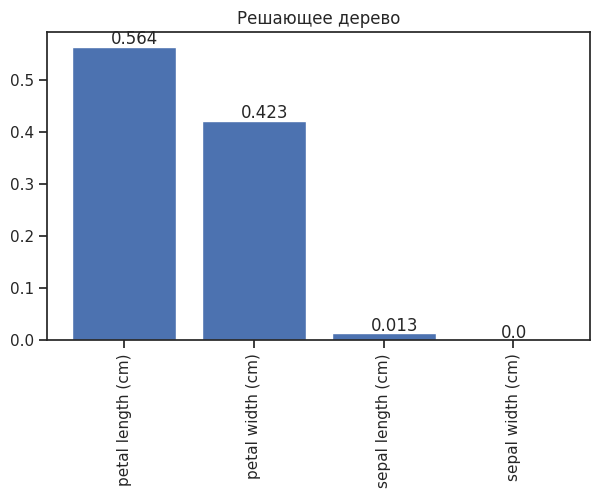

In [ ]:
_,_=draw_feature_importances(dtc1, iris_x_df, 'Решающее дерево')

In [ ]:
list(zip(iris_feature_names, SelectFromModel(dtc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', True),
 ('petal width (cm)', True)]

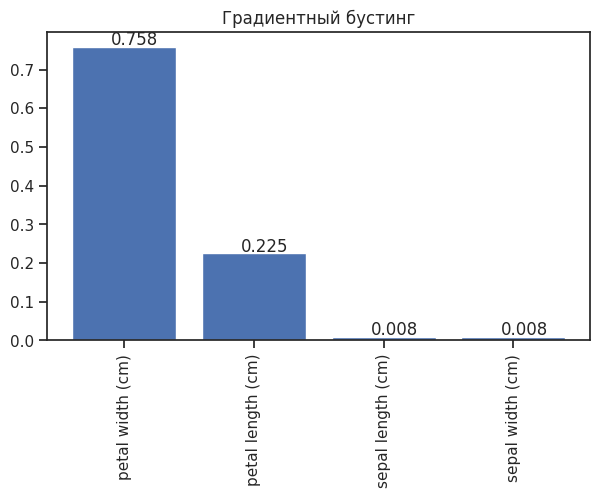

In [ ]:
_,_=draw_feature_importances(gbc1, iris_x_df, 'Градиентный бустинг')

In [ ]:
list(zip(iris_feature_names, SelectFromModel(gbc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', False),
 ('petal width (cm)', True)]

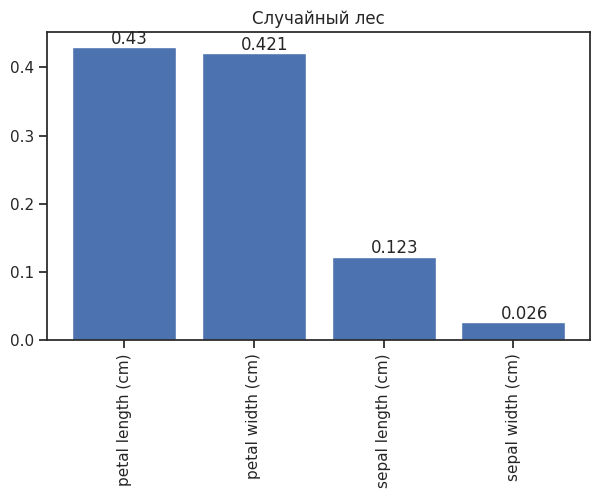

In [ ]:
_,_=draw_feature_importances(rfc1, iris_x_df, 'Случайный лес')

In [ ]:
list(zip(iris_feature_names, SelectFromModel(rfc1).fit(iris_X, iris_y).get_support()))

[('sepal length (cm)', False),
 ('sepal width (cm)', False),
 ('petal length (cm)', True),
 ('petal width (cm)', True)]